<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# Carga el dataset de trabajo
pd.set_option("display.max_columns", None) #Ver todo
df = pd.read_csv("datos/netflix_union.csv", index_col="Unnamed: 0")


In [3]:

df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,genre,premiere,runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Documentary,"October 2, 2020",90.0,7.5,English


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

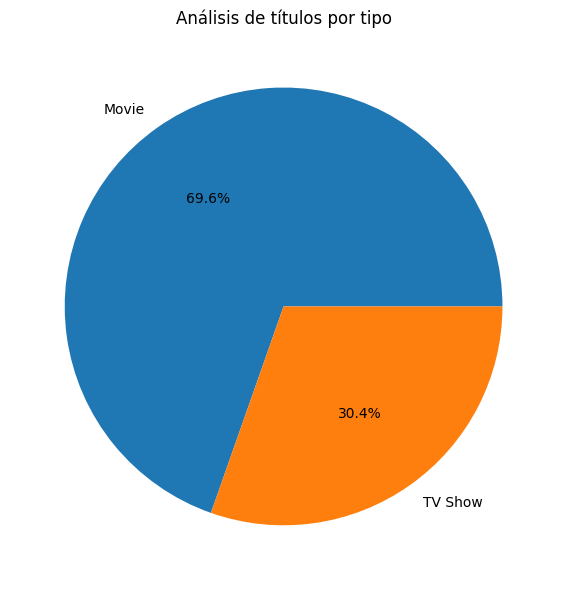

In [4]:
tipos = df["type"].value_counts()
data = [tipos[0],tipos[1]]
plt.figure(figsize=(8,6))
plt.pie(data,labels = tipos.index,autopct='%1.1f%%');
plt.title("Análisis de títulos por tipo")
plt.tight_layout()


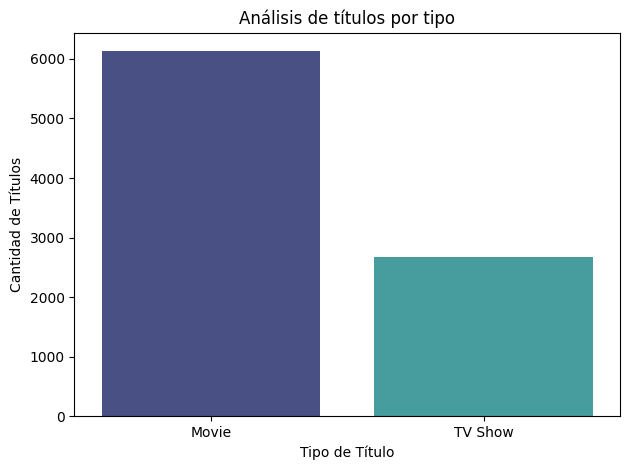

In [12]:
sns.countplot(x="type",data=df,palette="mako");
plt.title("Análisis de títulos por tipo")
plt.xlabel("Tipo de Título")
plt.ylabel("Cantidad de Títulos")
plt.tight_layout()



#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



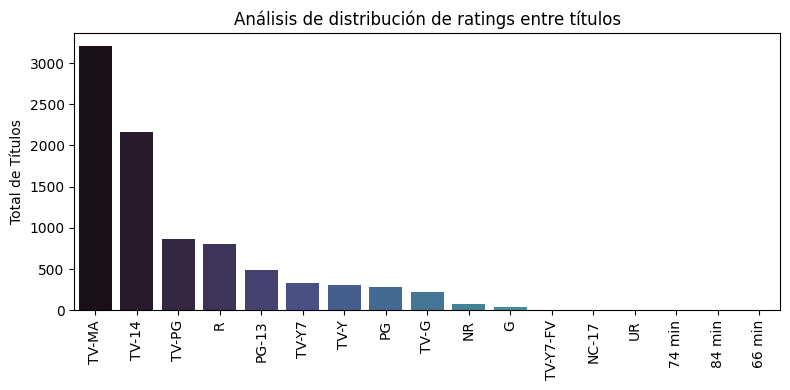

In [46]:
plt.figure(figsize = (8,4))
sns.countplot(x = "rating",
              data=df,
              palette="mako",
              order=df["rating"].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Total de Títulos")
plt.title("Análisis de distribución de ratings entre títulos")
plt.tight_layout()

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



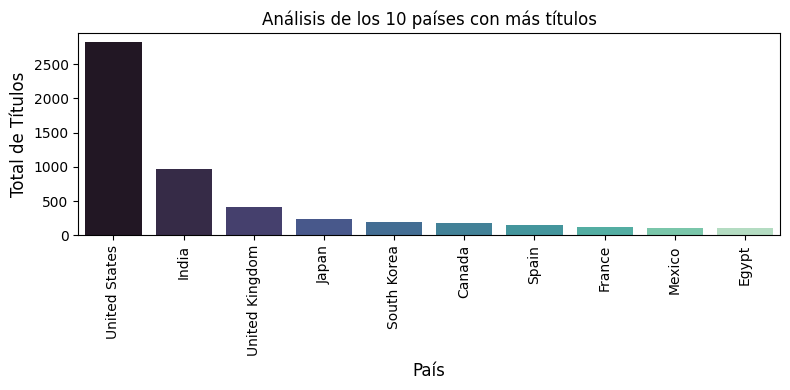

In [71]:
df_topten = df.groupby("country")["title"].count().nlargest(10)
plt.figure(figsize = (8,4))
sns.barplot(x= df_topten.index,
             y= df_topten.values,
             palette="mako")
plt.xlabel("País",fontsize=12)
plt.ylabel("Total de Títulos",fontsize=12)
plt.title("Análisis de los 10 países con más títulos")
plt.xticks(rotation=90)
plt.tight_layout()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

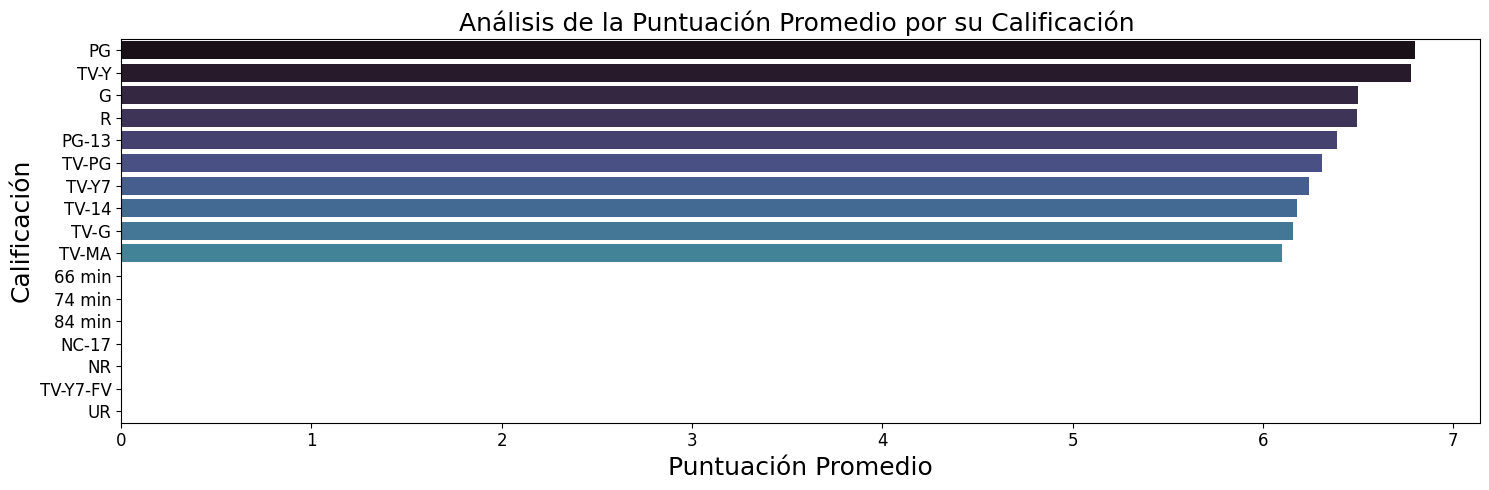

In [95]:
df_promedio = df.groupby("rating")["IMDB Score"].mean(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize = (15,5))
sns.barplot(y= df_promedio.index,
             x= df_promedio.values,
             palette="mako")
plt.ylabel("Calificación",fontsize=18)
plt.xlabel("Puntuación Promedio",fontsize=18)
plt.title("Análisis de la Puntuación Promedio por su Calificación ",fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()



#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


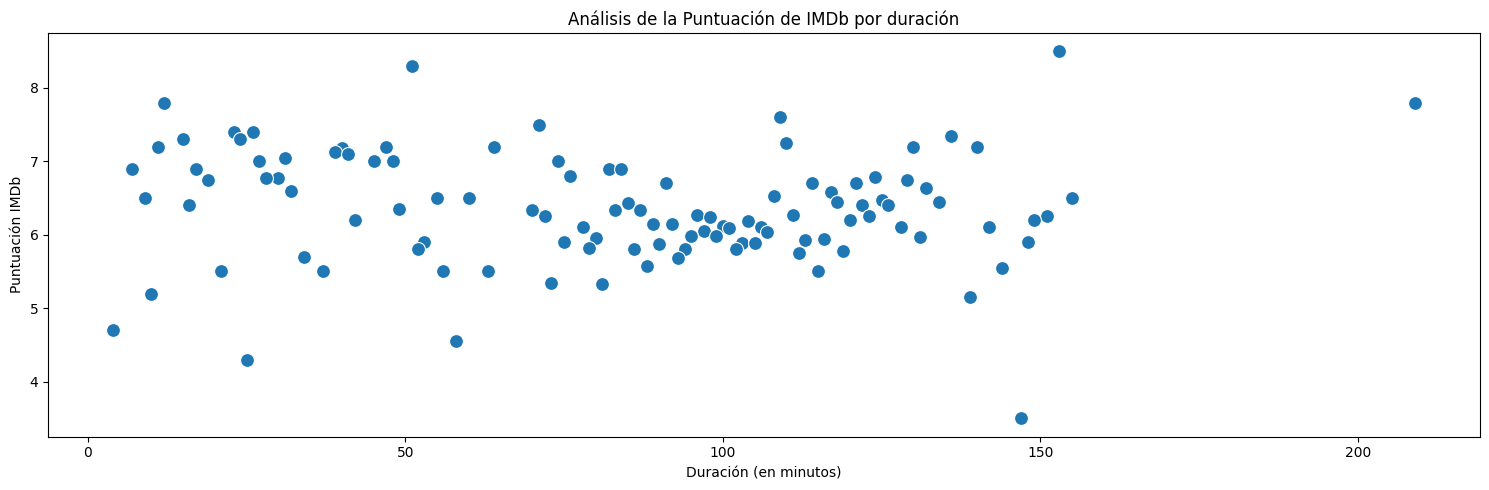

In [218]:
plt.figure(figsize = (15,5))
condicion = df["runtime"].notnull()
df_duracion = df[condicion].groupby("runtime")["IMDB Score"].mean(numeric_only=True).sort_values(ascending=False)

sns.scatterplot(x= df_duracion.index, y=df_duracion.values,s=100)#ci = False, tarde el triple
plt.title("Análisis de la Puntuación de IMDb por duración", fontsize = 12) #título a nuestra gráfica
plt.xlabel("Duración (en minutos)") #Etiqueta eje X
plt.ylabel("Puntuación IMDb") #Etiqueta eje Y
plt.tight_layout()


#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [321]:
df_topten_language = df.groupby("Language")["title"].count().nlargest(10)

df_topten_language


Language
English            352
Hindi               28
Spanish             26
French              18
Italian             14
Indonesian           9
Portuguese           9
English/Spanish      5
Japanese             5
Korean               5
Name: title, dtype: int64

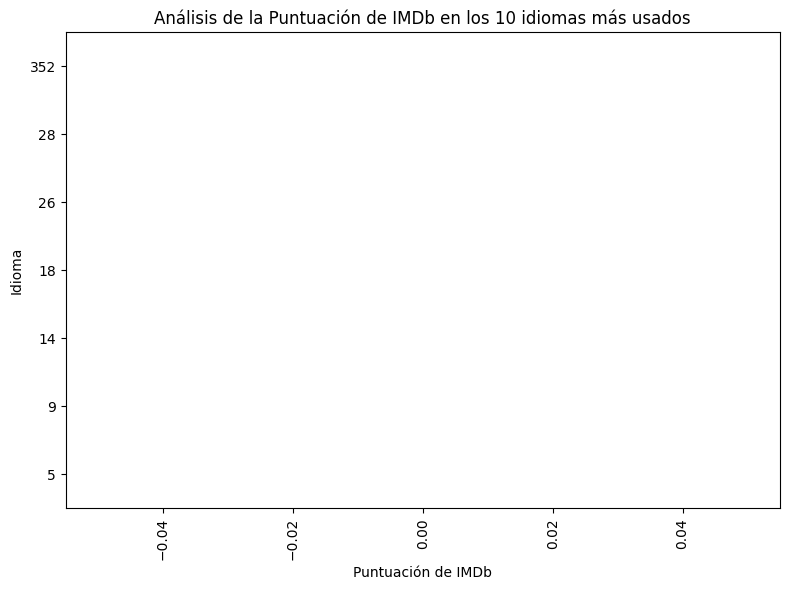

In [341]:
plt.figure(figsize=(8,6))
sns.violinplot(x= "IMDB Score", y="Language",data=df,order=df_topten_language.values)
plt.title("Análisis de la Puntuación de IMDb en los 10 idiomas más usados", fontsize = 12) #título a nuestra gráfica
plt.ylabel("Idioma") #Etiqueta eje X
plt.xlabel("Puntuación de IMDb") #Etiqueta eje Y
plt.xticks(rotation = 90)
plt.tight_layout()

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [368]:
df_topten = df.groupby("IMDB Score")["director"].value_counts().nlargest(10).reset_index(level=[0])
df_single_index = df_topten.drop(columns="count").nlargest(10,columns="IMDB Score")
df_single_index

,IMDB Score
director,
Damien O’Connor,7.1
Florent Bodin,6.8
Daryl Hannah,3.9
Olivier Megaton,3.7
Tarun Mansukhani,3.5
Terrie Samundra,3.4
"Matt Angel, Suzanne Coote",3.2
Bernardo Arellano,2.6
Elisa Fuksas,2.6


In [370]:
df_topten = df.groupby("director")["IMDB Score"].value_counts().nlargest(10)
plt.figure(figsize = (8,4))
sns.barplot(x= df_single_index.index,
             y= df_single_index.values,
             palette="mako")
plt.xlabel("País",fontsize=12)
plt.ylabel("Total de Títulos",fontsize=12)
plt.title("Análisis de los 10 países con más títulos")
plt.xticks(rotation=90)
plt.tight_layout()

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 800x400 with 0 Axes>

In [348]:
df_topten = df.groupby("director")["IMDB Score"].value_counts().nlargest(10)
df_topten

director                    IMDB Score
Damien O’Connor             7.1           2
Florent Bodin               6.8           2
Aaron Sorkin                7.8           1
Adam Leon                   6.5           1
Adam Wingard                4.4           1
Adrian Teh                  4.2           1
Ahn Byoung-wook             5.1           1
Akira Saitoh                4.7           1
Al Campbell, Alice Mathias  6.8           1
Alain Darborg               5.5           1
Name: count, dtype: int64

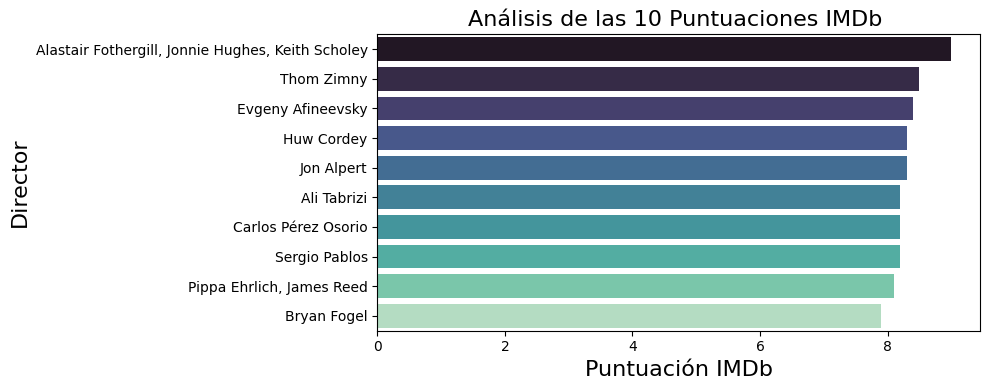

In [284]:
df_director = df.groupby("director")["IMDB Score"].mean().nlargest(10)
plt.figure(figsize=(10,4))
sns.barplot(y= df_director.index,
             x= df_director.values,
             palette="mako")
plt.ylabel("Director",fontsize=16)
plt.xlabel("Puntuación IMDb",fontsize=16)
plt.title("Análisis de las 10 Puntuaciones IMDb ",fontsize=16)

plt.tight_layout()

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


In [338]:
ratings = df["rating"].value_counts().index
ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

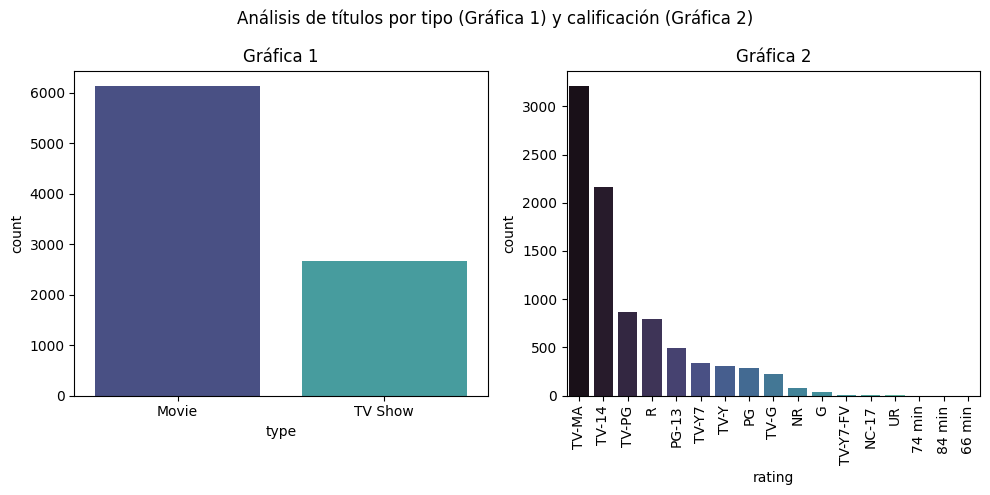

In [340]:
fig, axes = plt.subplots(1,2,figsize = (10,5)) #filas,columnas
sns.countplot(x="type",data = df,palette="mako", ax = axes[0])#pintamos el primero
sns.countplot(x = "rating",data=df,palette="mako", order=ratings, ax = axes[1]) #Cambiar color intervalo de confianza
axes[0].set_title("Gráfica 1")
axes[1].set_title("Gráfica 2")
plt.suptitle("Análisis de títulos por tipo (Gráfica 1) y calificación (Gráfica 2)")
plt.xticks(rotation = 90)
plt.tight_layout()# Esto siempre al final

#### Ejercicio 10: tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.
- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



In [398]:
top6 = df.groupby("country")["title"].count().nlargest(6)
condicion = df["country"] == top6.index[0]
condicion1 = df["country"] == top6.index[1]
condicion2 = df["country"] == top6.index[2]
condicion3 = df["country"] == top6.index[3]
condicion4 = df["country"] == top6.index[4]
condicion5 = df["country"] == top6.index[5]
df_p_1 = df[condicion]
df_p_2 = df[condicion]
df_p_3 = df[condicion]
df_p_4 = df[condicion]
df_p_5 = df[condicion]


AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'

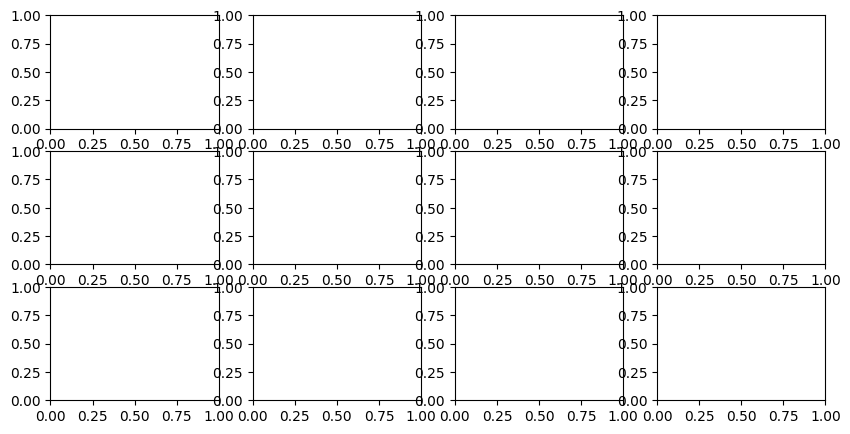

In [400]:
fig, axes = plt.subplots(3,4,figsize = (10,5)) #filas,columnas
sns.countplot(x="type",data= df_p_1, palette="mako", ax = axes[0])#pintamos el primero

In [372]:
top_10_countries = df.nlargest(10, 'IMDB Score')

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.